In [31]:
import pandas as pd
import numpy as np
import ast
from matplotlib import pyplot as plt
import seaborn as sns
import math
import time

In [9]:
# So we can see all of the columns
pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 600)

In [57]:
df = pd.read_csv("datas/pre_onehot.csv")
df = df.drop(columns="id").iloc[0:15696,]

In [20]:
df.head()

,property_type,price,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,accommodates,bathrooms,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,instant_bookable,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count,description_length,name_length,shared_bathrooms,has_washer,has_dryer,has_dishwasher,has_freezer,has_bbq_grill,has_free_parking_on_premises,has_paid_parking_on_premises,has_free_street_parking,has_city_skyline_view,has_shared_beach_access,has_courtyard_view,has_oven,has_radiant_heating,has_dedicated_workspace,has_fire_extinguisher,has_carbon_monoxide_alarm,has_outdoor_furniture,has_hot_tub,has_pool,has_gym,has_balcony,has_backyard,has_beachfront,has_resort,has_sound_system,location_cluster
0,Entire rental unit,4.0,Bedford-Stuyvesant,Brooklyn,40.684560,-73.939870,1432339200000000000,within a day,100.0,100.0,True,2.0,2.0,True,True,1,1,0,0,Entire home/apt,4,2.0,2.0,2.0,12,42,70,70,False,30,1125,34,5,1,1556409600000000000,1723248000000000000,5.00,5.00,4.97,5.00,5.00,4.71,4.94,0.52,32,491.0,33,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,295
1,Private room in rental unit,3.0,Flatbush,Brooklyn,40.638991,-73.965739,1694649600000000000,within an hour,100.0,98.0,True,1.0,1.0,True,True,1,0,1,0,Private room,2,1.0,1.0,2.0,10,20,49,324,False,1,29,30,30,6,1705104000000000000,1725235200000000000,4.83,4.87,4.93,4.80,4.90,4.90,4.63,3.81,37,497.0,24,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,153
2,Entire rental unit,3.0,Fort Hamilton,Brooklyn,40.618810,-74.032380,1659225600000000000,within an hour,100.0,100.0,False,52.0,55.0,True,True,52,50,2,0,Entire home/apt,2,1.0,0.0,1.0,17,44,70,146,True,1,29,5,5,2,1719446400000000000,1723852800000000000,4.60,4.80,4.20,4.80,4.80,4.80,4.20,2.14,34,305.0,48,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,48
3,Private room in rental unit,0.0,Crown Heights,Brooklyn,40.673970,-73.953990,1344643200000000000,within an hour,99.0,23.0,False,727.0,1336.0,True,True,719,0,719,0,Private room,1,1.5,4.0,1.0,0,0,0,111,False,30,365,0,0,0,1648857600000000000,1714348800000000000,4.85,4.88,4.82,4.94,4.94,4.82,4.75,0.61,14,500.0,43,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,69
4,Room in hotel,2.0,Midtown,Manhattan,40.747180,-73.985390,1419292800000000000,within an hour,93.0,95.0,False,707.0,2453.0,True,True,73,0,0,0,Hotel room,2,1.0,1.0,1.0,4,13,22,241,True,1,1125,0,0,0,1648857600000000000,1714348800000000000,4.85,4.88,4.82,4.94,4.94,4.82,4.75,0.61,24,484.0,44,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,100


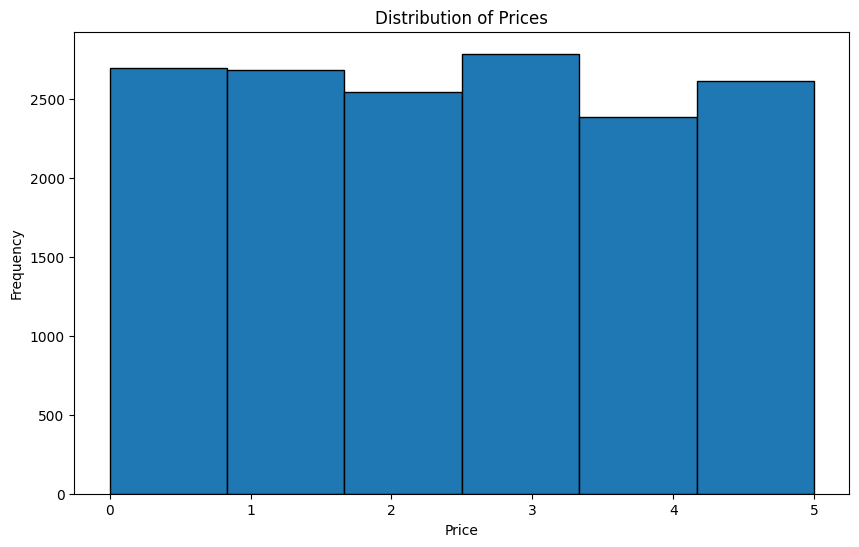

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=6, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [21]:
df["property_type"].value_counts()

property_type
Entire rental unit                    6516
Private room in rental unit           3943
Private room in home                  1295
Entire home                            716
Private room in townhouse              480
Entire condo                           474
Room in hotel                          432
Private room in condo                  236
Entire townhouse                       216
Entire guest suite                     195
Entire loft                            172
Entire serviced apartment              144
Room in boutique hotel                 124
Shared room in rental unit             112
Private room in serviced apartment      99
Private room in guest suite             87
Private room in loft                    55
Entire place                            46
Private room in bed and breakfast       40
Room in aparthotel                      39
Private room in casa particular         31
Shared room in home                     31
Entire guesthouse                       

In [63]:
df["neighbourhood_cleansed"].value_counts().head(10)

neighbourhood_cleansed
Bedford-Stuyvesant    1236
Midtown                889
Harlem                 730
Upper East Side        698
Hell's Kitchen         698
Williamsburg           646
Bushwick               597
Upper West Side        550
Crown Heights          510
East Village           328
Name: count, dtype: int64

In [64]:
df["neighbourhood_cleansed"].value_counts().tail(10)

neighbourhood_cleansed
Lighthouse Hill    1
Silver Lake        1
Gerritsen Beach    1
Country Club       1
Hollis Hills       1
Howland Hook       1
Todt Hill          1
Grymes Hill        1
Rossville          1
New Dorp Beach     1
Name: count, dtype: int64

In [23]:
df["room_type"].value_counts()

room_type
Entire home/apt    8592
Private room       6737
Hotel room          200
Shared room         167
Name: count, dtype: int64

In [28]:
# Group by room type and calculate average price quantile
room_type_prices = df.groupby('room_type')['price'].mean()
print("Average Price Quantile by Room Type:")
print(room_type_prices)
print("\n")

# Group by neighborhood group and calculate average price quantile
neighborhood_prices = df.groupby('neighbourhood_group_cleansed')['price'].mean()
print("Average Price Quantile by Neighborhood Group:")
print(neighborhood_prices)

Average Price Quantile by Room Type:
room_type
Entire home/apt    3.301094
Hotel room         3.690000
Private room       1.400178
Shared room        1.005988
Name: price, dtype: float64


Average Price Quantile by Neighborhood Group:
neighbourhood_group_cleansed
Bronx            1.518760
Brooklyn         2.110435
Manhattan        3.164613
Queens           1.692821
Staten Island    1.642857
Name: price, dtype: float64


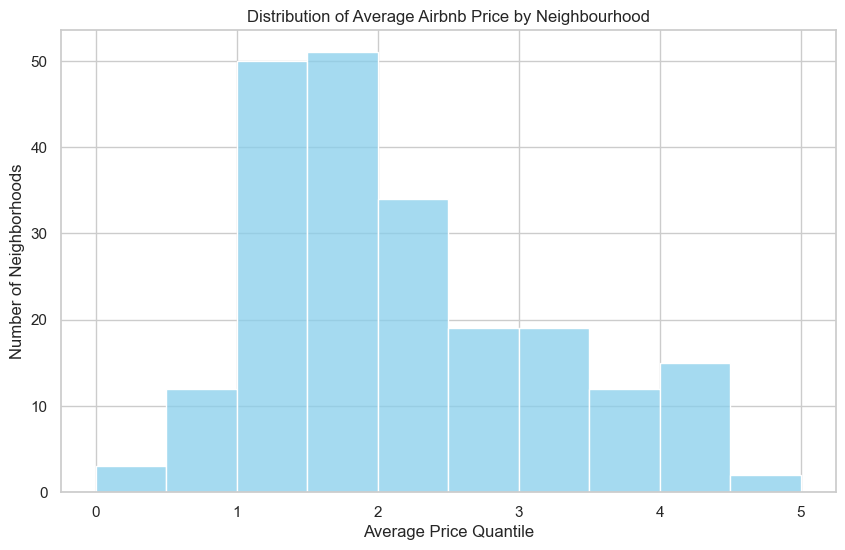

In [33]:
# Calculate average price grouped by "neighbourhood_cleansed"
average_price_by_neighbourhood = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
average_price_by_neighbourhood.rename(columns={'price': 'average_price'}, inplace=True)

# Create a histogram of the average prices
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(average_price_by_neighbourhood['average_price'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Average Airbnb Price by Neighbourhood')
plt.xlabel('Average Price Quantile')
plt.ylabel('Number of Neighborhoods')
plt.show()

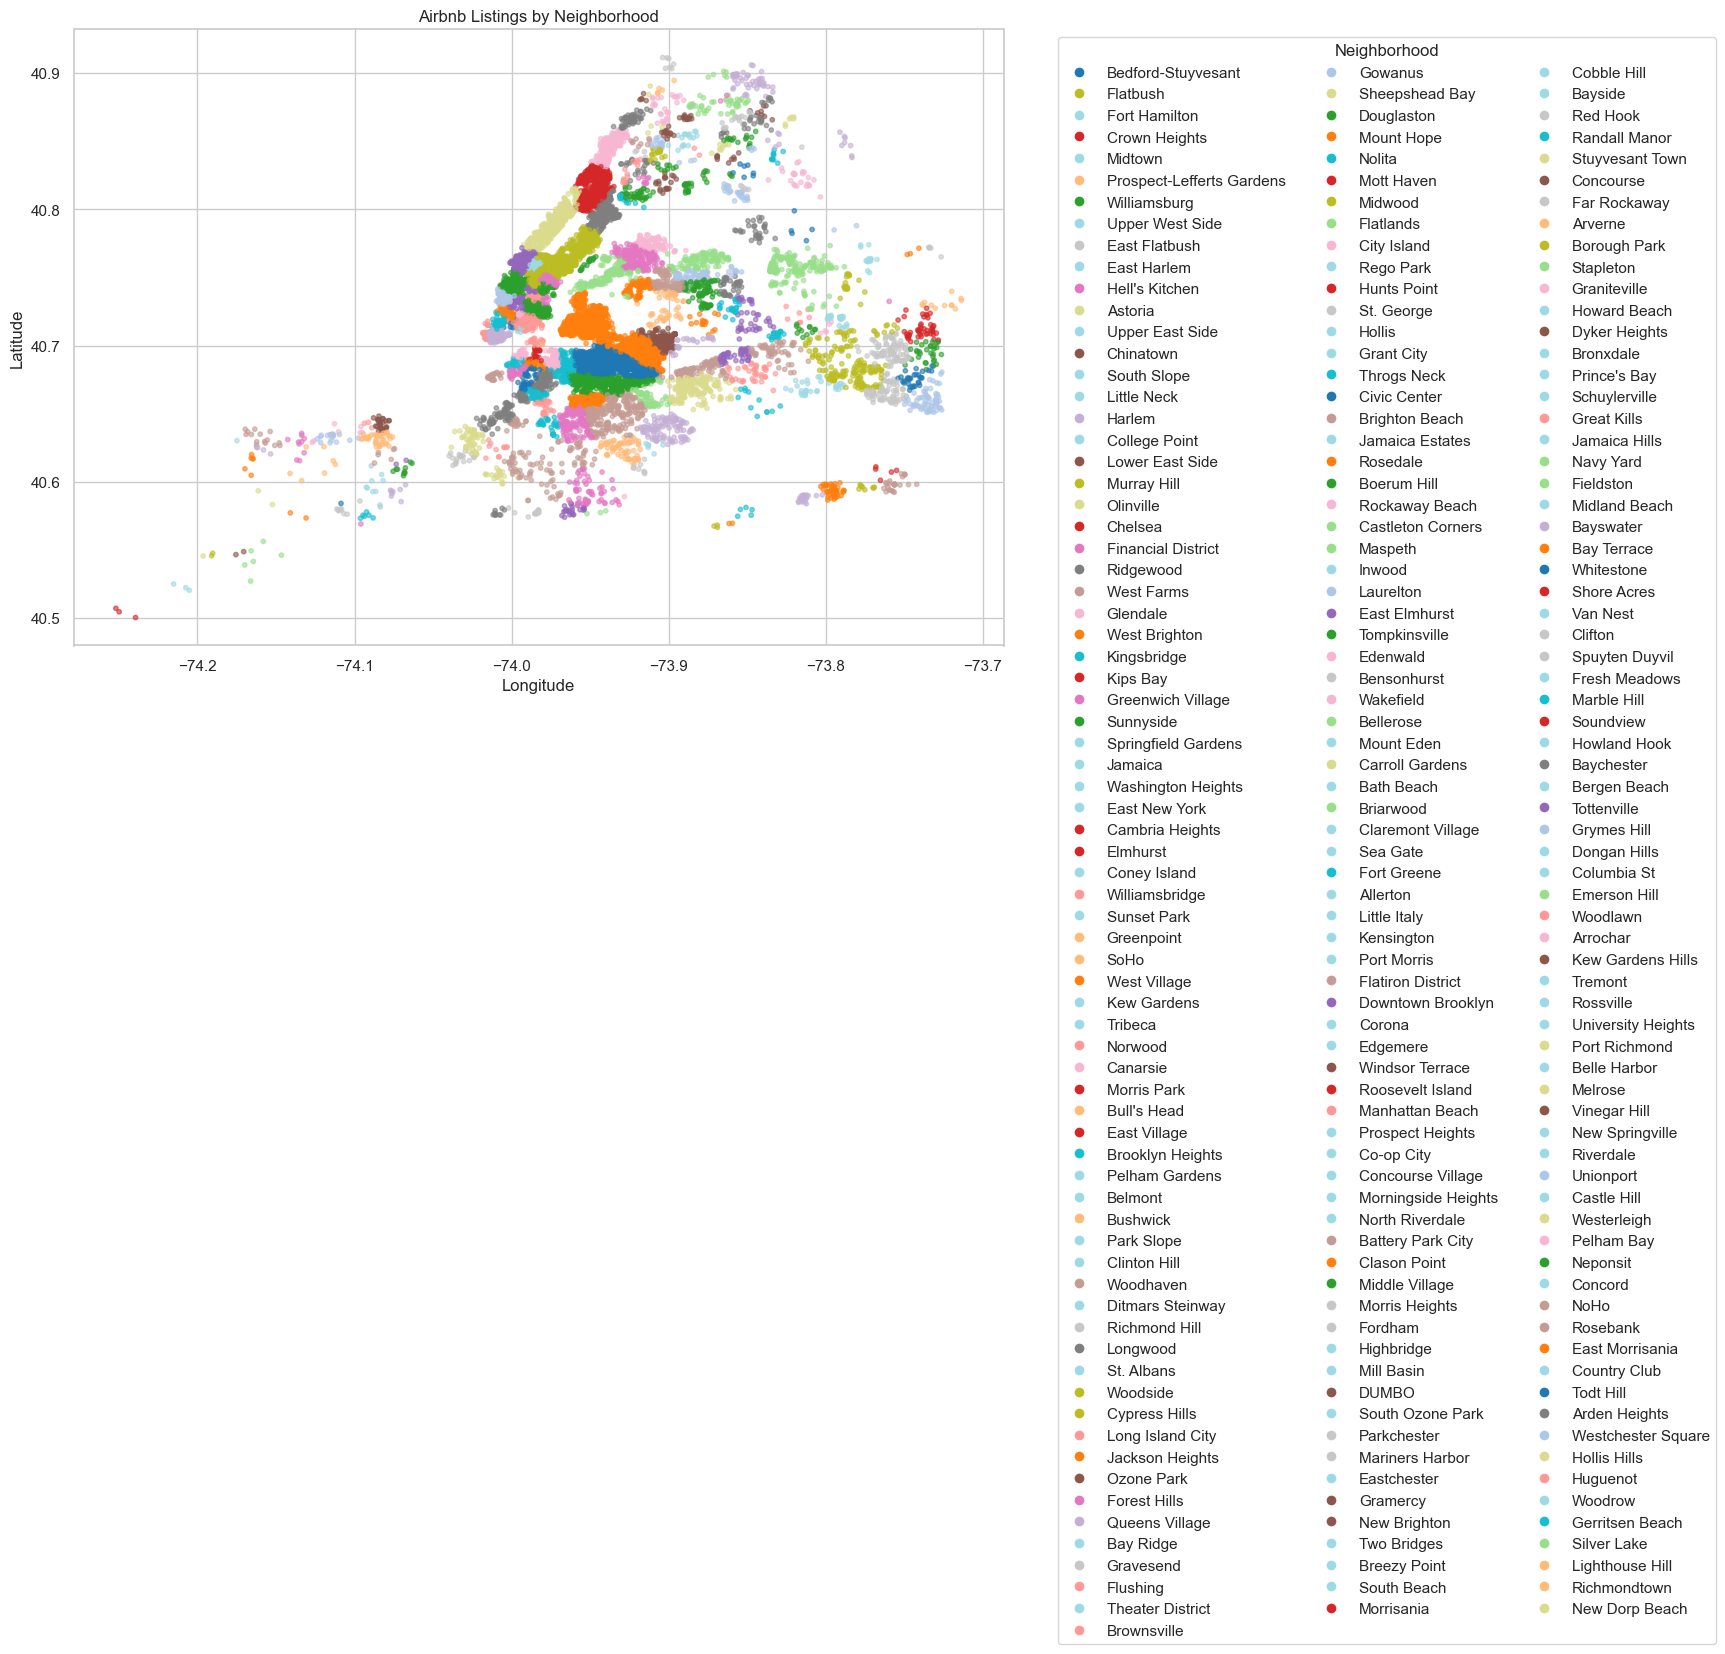

In [44]:
# Prepare unique neighborhoods and assign colors
unique_neighborhoods = df['neighbourhood_cleansed'].unique()
neighborhood_to_color = {neighborhood: np.random.randint(300) for idx, neighborhood in enumerate(unique_neighborhoods)}
colors = df['neighbourhood_cleansed'].map(neighborhood_to_color)

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['longitude'], df['latitude'], 
    c=colors, cmap='tab20', alpha=0.6, s=10
)

# Add a legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(neighborhood_to_color[neighborhood] / len(unique_neighborhoods)), markersize=8) 
    for neighborhood in unique_neighborhoods
]
plt.legend(handles, unique_neighborhoods, bbox_to_anchor=(1.05, 1), loc='upper left', title='Neighborhood', ncol=3)

# Add labels and title
plt.title('Airbnb Listings by Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

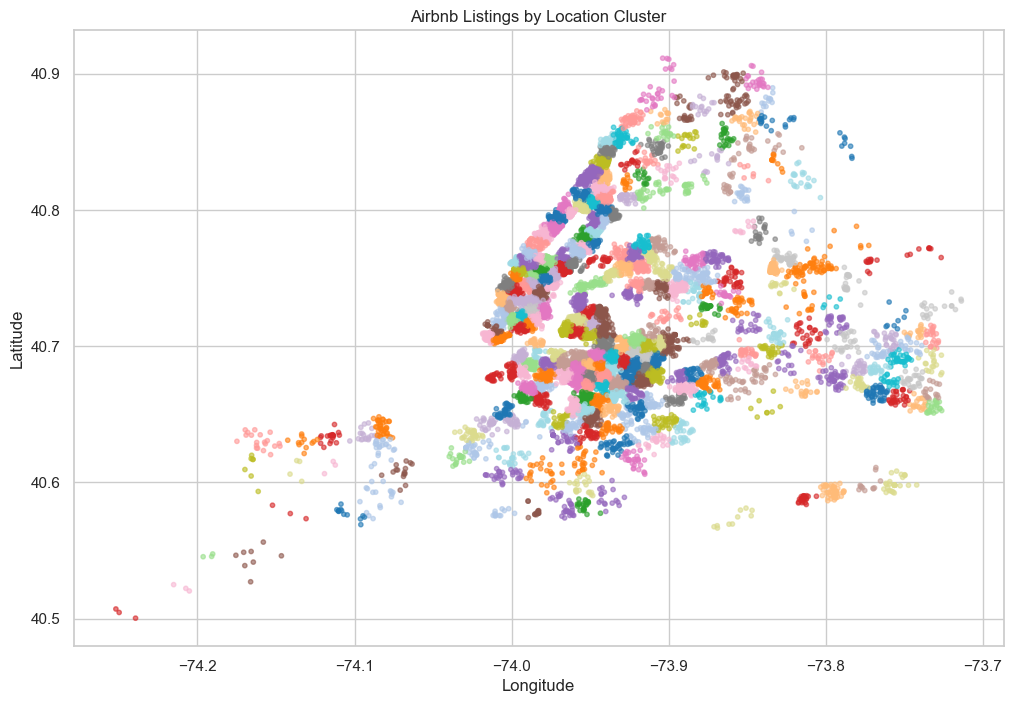

In [46]:
# Prepare unique clusters and assign colors
unique_clusters = df['location_cluster'].unique()
cluster_to_color = {cluster: np.random.randint(300) for idx, cluster in enumerate(unique_clusters)}
colors = df['location_cluster'].map(cluster_to_color)

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot all clusters
plt.scatter(
    df['longitude'], 
    df['latitude'], 
    c=colors, 
    cmap='tab20', 
    alpha=0.6, 
    s=10,
    label="Clusters"
)

# Add labels and title
plt.title('Airbnb Listings by Location Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

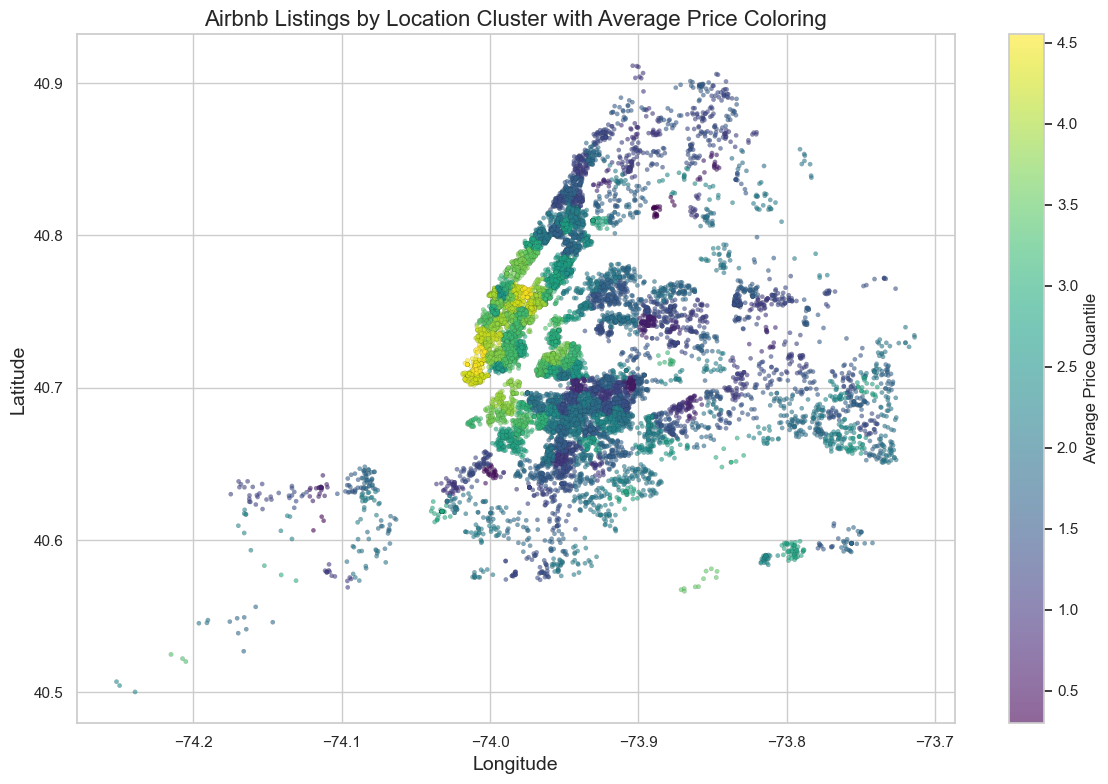

In [58]:
# Calculate the average price per cluster
average_price_per_cluster = df.groupby('location_cluster')['price'].mean().reset_index()
average_price_per_cluster.rename(columns={'price': 'average_price'}, inplace=True)

# Merge the average price back into the original DataFrame
df = df.merge(average_price_per_cluster, on='location_cluster', how='left')

# Create the scatter plot colored by average price
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['longitude'], 
    df['latitude'], 
    c=df['average_price'], 
    cmap='viridis', 
    alpha=0.6, 
    s=10,
    edgecolor='k',
    linewidth=0.1
)
plt.title('Airbnb Listings by Location Cluster with Average Price Coloring', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Average Price Quantile', fontsize=12)
plt.tight_layout()
plt.show()


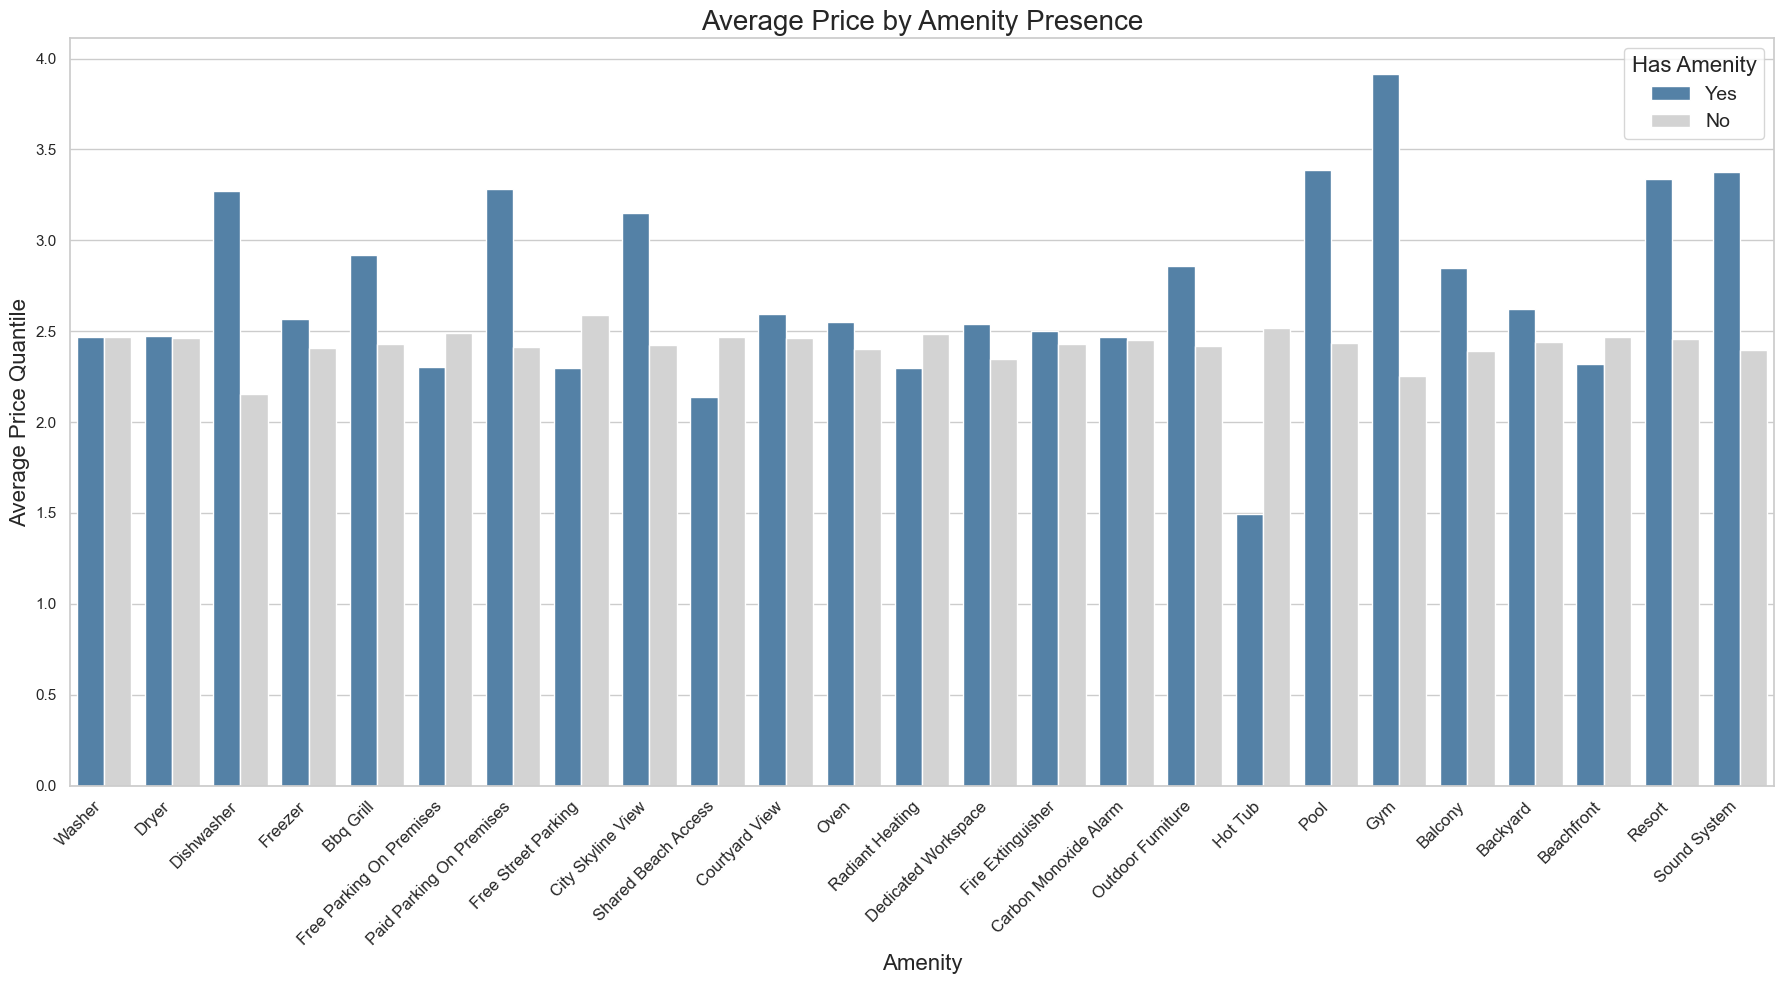

In [61]:
# Identify Amenity Columns that start with 'has_'
amenity_columns = [col for col in df.columns if col.startswith('has_')]

df_to_use = df.copy()

# Calculate Average Prices Based on Amenity Presence
data = []

for amenity in amenity_columns:
    if df_to_use[amenity].nunique() <= 2:
        avg_price_yes = df_to_use[df_to_use[amenity] == 1]['price'].mean()
        avg_price_no = df_to_use[df_to_use[amenity] == 0]['price'].mean()
        
        data.append({
            'Amenity': amenity.replace('has_', '').replace('_', ' ').title(),
            'Has Amenity': 'Yes',
            'Average Price': avg_price_yes
        })
        data.append({
            'Amenity': amenity.replace('has_', '').replace('_', ' ').title(),
            'Has Amenity': 'No',
            'Average Price': avg_price_no
        })

# Create DataFrame
avg_price_df = pd.DataFrame(data)

# Plot the Bar Chart
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

bar_plot = sns.barplot(
    data=avg_price_df,
    x='Amenity',
    y='Average Price',
    hue='Has Amenity',
    palette={'Yes': 'steelblue', 'No': 'lightgray'}
)

plt.title('Average Price by Amenity Presence', fontsize=20)
plt.xlabel('Amenity', fontsize=16)
plt.ylabel('Average Price Quantile', fontsize=16)
plt.legend(title='Has Amenity', title_fontsize=16, fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()
